<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [5]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


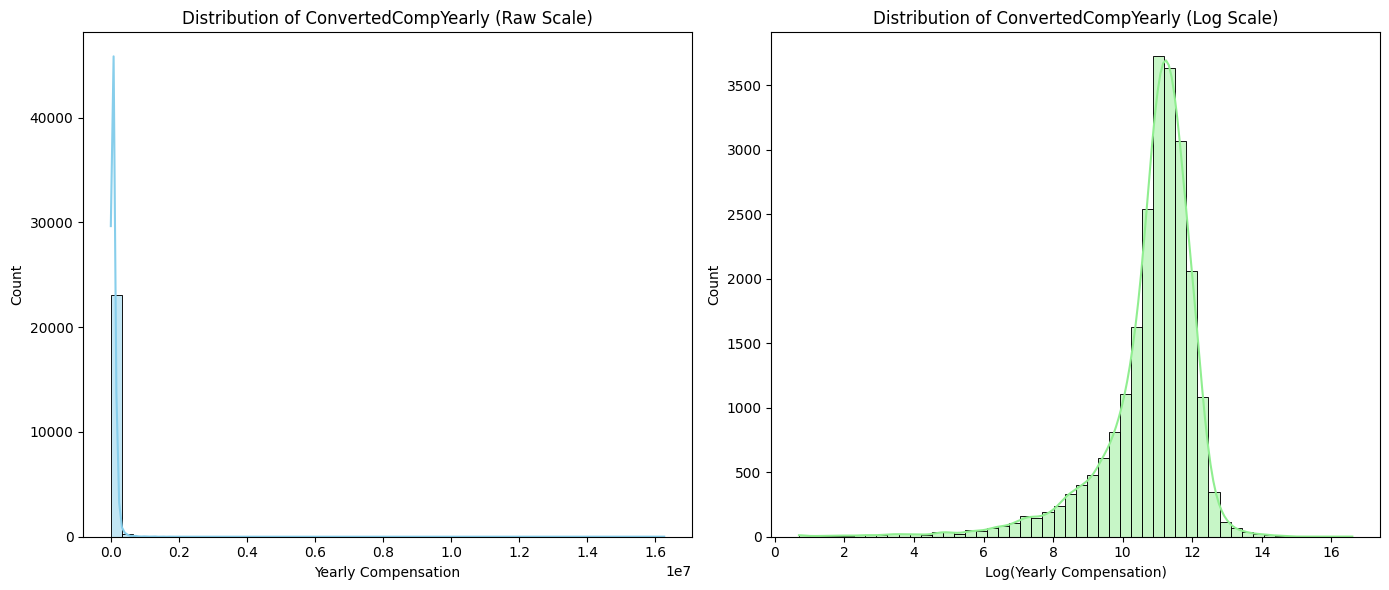

In [6]:
## Write your code here
# Drop missing values
comp = df["ConvertedCompYearly"].dropna()

plt.figure(figsize=(14, 6))

# --- Histogram (raw scale) ---
plt.subplot(1, 2, 1)
sns.histplot(comp, bins=50, kde=True, color="skyblue")
plt.title("Distribution of ConvertedCompYearly (Raw Scale)")
plt.xlabel("Yearly Compensation")
plt.ylabel("Count")

# --- Histogram (log scale) ---
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(comp), bins=50, kde=True, color="lightgreen")  # log1p = log(x+1)
plt.title("Distribution of ConvertedCompYearly (Log Scale)")
plt.xlabel("Log(Yearly Compensation)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [7]:
## Write your code here
# Filter full-time employees
fulltime_df = df[df["Employment"] == "Employed, full-time"]

# Median compensation
median_fulltime_comp = fulltime_df["ConvertedCompYearly"].median()

print("Median compensation (Employed, full-time):", median_fulltime_comp)

Median compensation (Employed, full-time): 69814.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



/tmp/ipykernel_806/1339439746.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered, x="ConvertedCompYearly", y="Country", palette="Set3", showfliers=True)


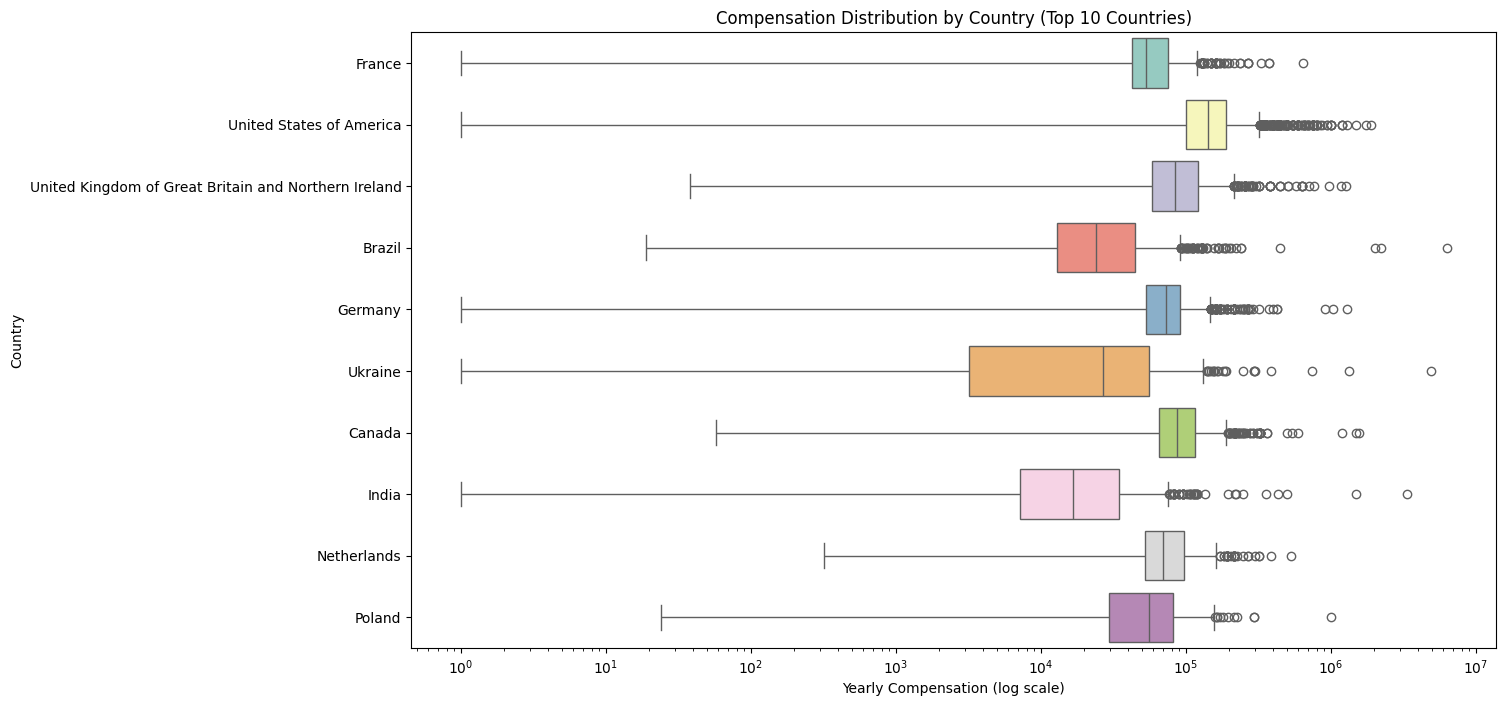

In [8]:
## Write your code here
# Drop missing values
comp_by_country = df[["Country", "ConvertedCompYearly"]].dropna()

# Top 10 countries by response count
top_countries = comp_by_country["Country"].value_counts().head(10).index
filtered = comp_by_country[comp_by_country["Country"].isin(top_countries)]

# Box plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered, x="ConvertedCompYearly", y="Country", palette="Set3", showfliers=True)
plt.xscale("log")  # log scale to handle skewness
plt.title("Compensation Distribution by Country (Top 10 Countries)")
plt.xlabel("Yearly Compensation (log scale)")
plt.ylabel("Country")
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [9]:
## Write your code here
# Drop missing values for compensation
comp = df["ConvertedCompYearly"].dropna()

# Quartiles and IQR
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

# Bounds (clamp lower bound at 0)
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

# Filter dataset to exclude outliers
df_refined = df[(df["ConvertedCompYearly"] >= lower_bound) &
                (df["ConvertedCompYearly"] <= upper_bound)]

print("Original dataset size:", len(df))
print("Refined dataset size (without outliers):", len(df_refined))
print("Rows removed:", len(df) - len(df_refined))


Original dataset size: 65437
Refined dataset size (without outliers): 22457
Rows removed: 42980


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.406993       -0.059643
WorkExp                         0.406993  1.000000       -0.032388
JobSatPoints_1                 -0.059643 -0.032388        1.000000


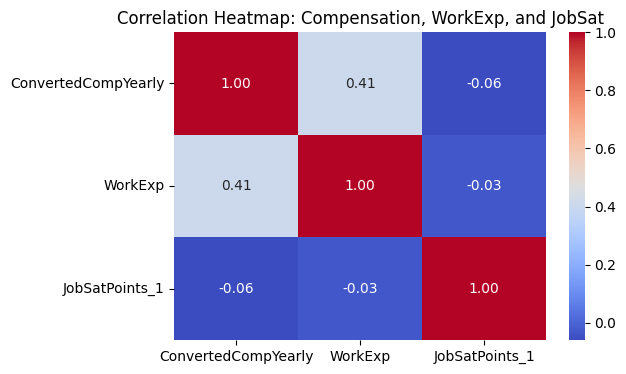

In [10]:
## Write your code here
# Select only relevant numeric columns
corr_cols = ["ConvertedCompYearly", "WorkExp", "JobSatPoints_1"]

# Drop missing values
corr_df = df_refined[corr_cols].dropna()

# Pearson correlation
corr_matrix = corr_df.corr(method="pearson")
print(corr_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap: Compensation, WorkExp, and JobSat")
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


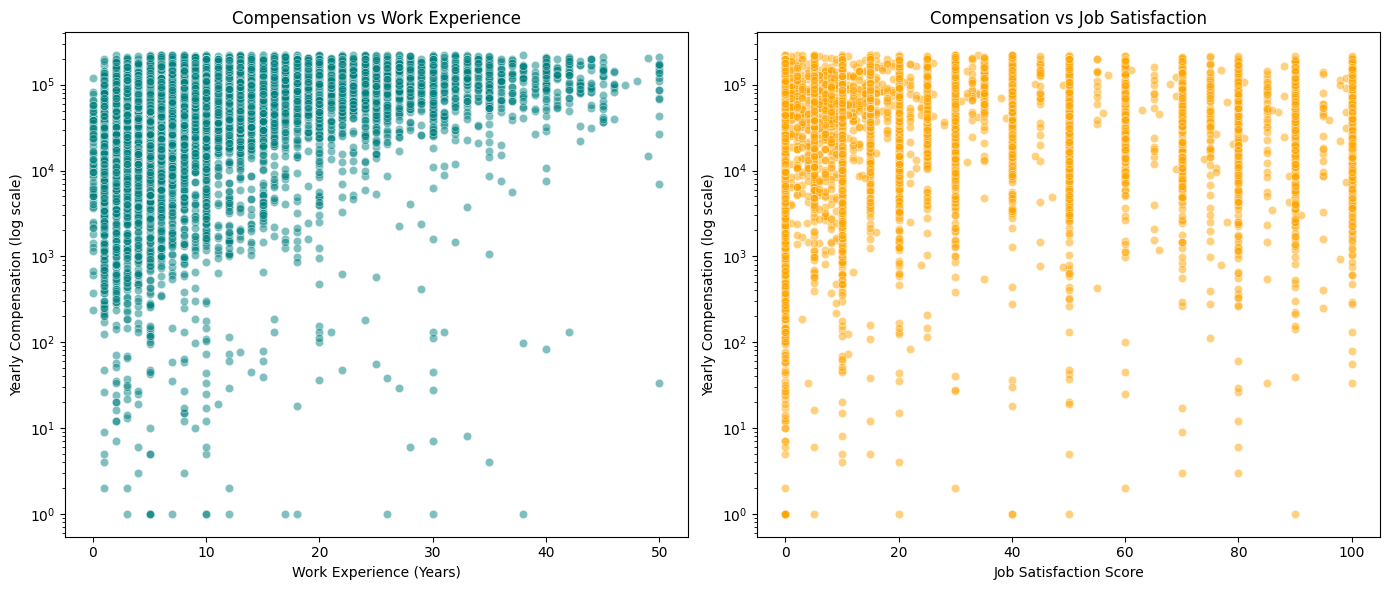

In [11]:
## Write your code here
plt.figure(figsize=(14, 6))

# --- Compensation vs Work Experience ---
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_refined, x="WorkExp", y="ConvertedCompYearly",
                alpha=0.5, color="teal")
plt.yscale("log")
plt.title("Compensation vs Work Experience")
plt.xlabel("Work Experience (Years)")
plt.ylabel("Yearly Compensation (log scale)")

# --- Compensation vs Job Satisfaction ---
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_refined, x="JobSatPoints_1", y="ConvertedCompYearly",
                alpha=0.5, color="orange")
plt.yscale("log")
plt.title("Compensation vs Job Satisfaction")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Yearly Compensation (log scale)")

plt.tight_layout()
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
